In [1]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
import random
import string
from Crypto.Cipher import AES
import cv2
from matplotlib import pyplot as plt


In [12]:
img = img = cv2.imread('../images/input.jpg')


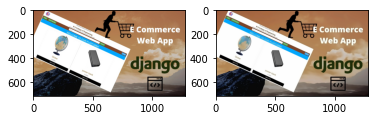

True

In [14]:
dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
plt.subplot(121),plt.imshow(img)
plt.subplot(122),plt.imshow(dst)
plt.show()
cv2.imwrite('../images/cleaned_input.jpg',dst)

In [15]:
img = '../images/cleaned_input.jpg'

In [16]:
with open(img, 'rb') as fd:
    contents = fd.read()

In [17]:
AES_KEY = ''.join(random.choice(string.ascii_uppercase + string.ascii_lowercase + string.digits) for x in range(32))

AES_IV = ''.join(random.choice(string.ascii_uppercase + string.ascii_lowercase + string.digits) for x in range(16))

In [4]:
encryptor = AES.new(AES_KEY.encode("utf-8"), AES.MODE_CFB, AES_IV.encode("utf-8"))
encrypted_img = encryptor.encrypt(contents)

In [5]:
with open('../images/encrypted_img_file.jpg', 'wb') as fd:
    fd.write(encrypted_img)
print("A file titled 'encrypted_img_file.wav' is generated which is the encrypted audio to be communicated")

A file titled 'encrypted_img_file.wav' is generated which is the encrypted audio to be communicated


In [6]:
with open('../images/encrypted_img_file.jpg', 'rb') as fd:
    contents = fd.read()

In [7]:
decryptor = AES.new(AES_KEY.encode("utf-8"), AES.MODE_CFB, AES_IV.encode("utf-8"))
decrypted_img = decryptor.decrypt(contents)

In [8]:
with open('../images/decrypted_img_file.jpg', 'wb') as fd:
    fd.write(decrypted_img)